# Pre-Trained project


In [439]:
import warnings
warnings.filterwarnings("ignore")

print("완료!")

완료!


In [440]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.14.0


In [441]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bot_adversarial_dialogue', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar100_n', 'cifar10_1', 'cifar10_corrupted', 'cifar10_h', 'cifar10_n', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'conll2002', 'conll2003', 'controlled_noisy_web_labels', 'coqa', 'corr2cause', 

In [442]:
# Google drive mount
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [443]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='tf_flowers',
    split=['train[:65%]', 'train[65%:80%]', 'train[80%:]'],
    data_dir='/content/drive/My Drive/tf_flowers/',
    download=True,
    with_info=True,
    as_supervised=True,
)

In [444]:
print(raw_train)
print(raw_validation)
print(raw_test)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [445]:
# import tensorflow as tf
# import os
# from PIL import Image
# import tensorflow_datasets as tfds

# # 이미지를 저장할 구글 드라이브 내의 폴더를 지정합니다.
# save_dir = '/content/drive/My Drive/tf_flowers/images/'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# # 데이터셋에서 이미지를 추출하고 파일로 저장하는 함수입니다.
# def save_dataset_to_drive(dataset, save_dir):
#     for i, (image, label) in enumerate(tfds.as_numpy(dataset)):
#       try:
#         # 이미지 파일의 경로를 설정합니다.
#         image_path = os.path.join(save_dir, f'image_{i}_label_{label}.jpeg')

#         # PIL 이미지 객체로 변환합니다.
#         pil_image = Image.fromarray(image)

#         # 이미지를 JPEG 형식으로 저장합니다.
#         pil_image.save(image_path)
#         print(f'Saved image {i} to {image_path}')  # 진행 상황 출력
#       except Exception as e:
#         print(f'Error saving image {i}: {e}')  # 에러 발생 시 출력
#         continue

# # 데이터셋의 전체 이미지를 저장합니다.
# save_dataset_to_drive(raw_train, save_dir)
# save_dataset_to_drive(raw_validation, save_dir)
# save_dataset_to_drive(raw_test, save_dir)

In [446]:
# Visualization set
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("슝~")

슝~


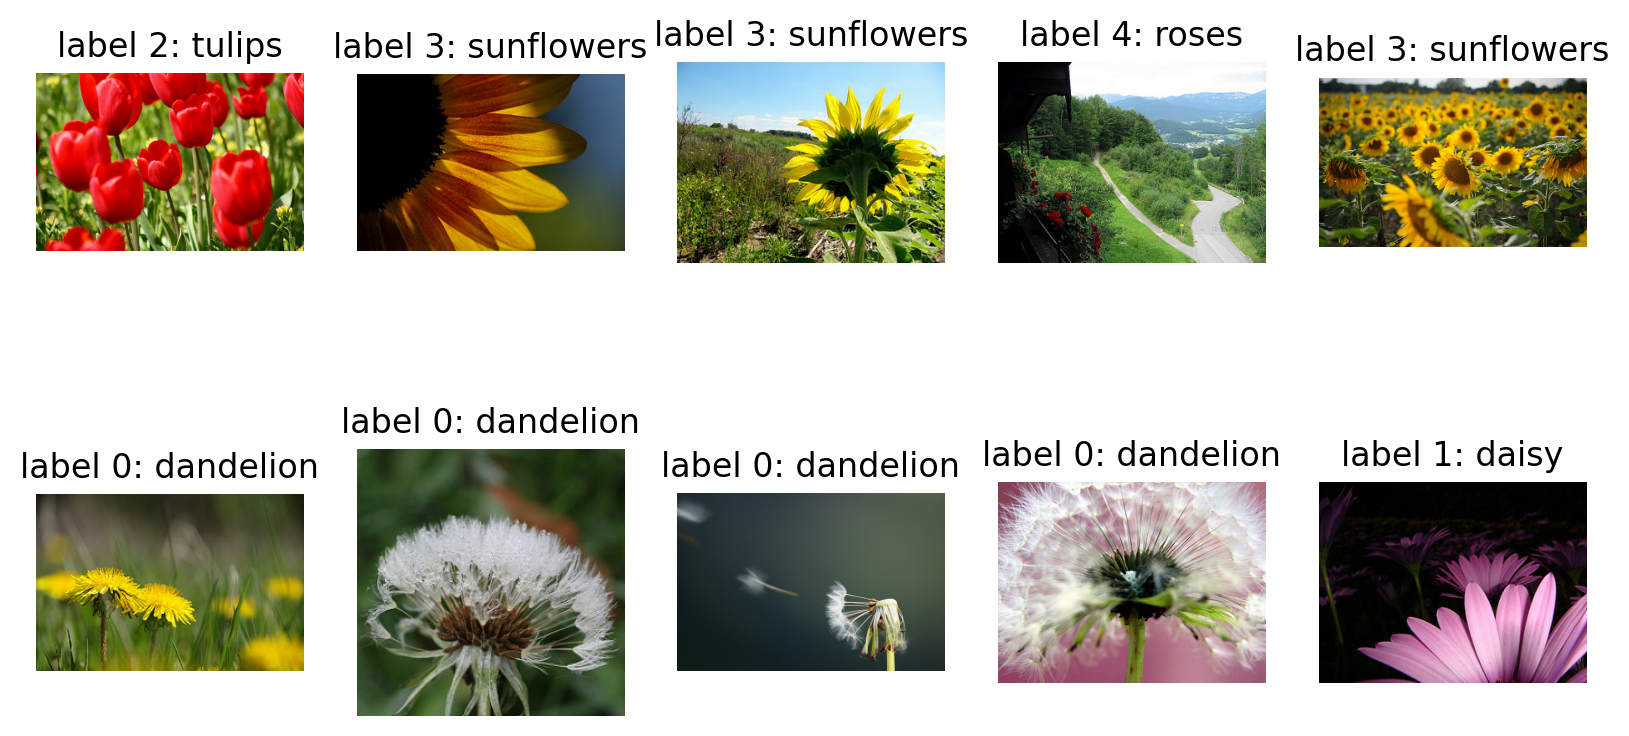

In [447]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [448]:
IMG_SIZE = 160 # 리사이징할 이미지의 크기 ## pre model 전체사용하자 데이터가 너무 적음

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

print("슝~")

슝~


In [449]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


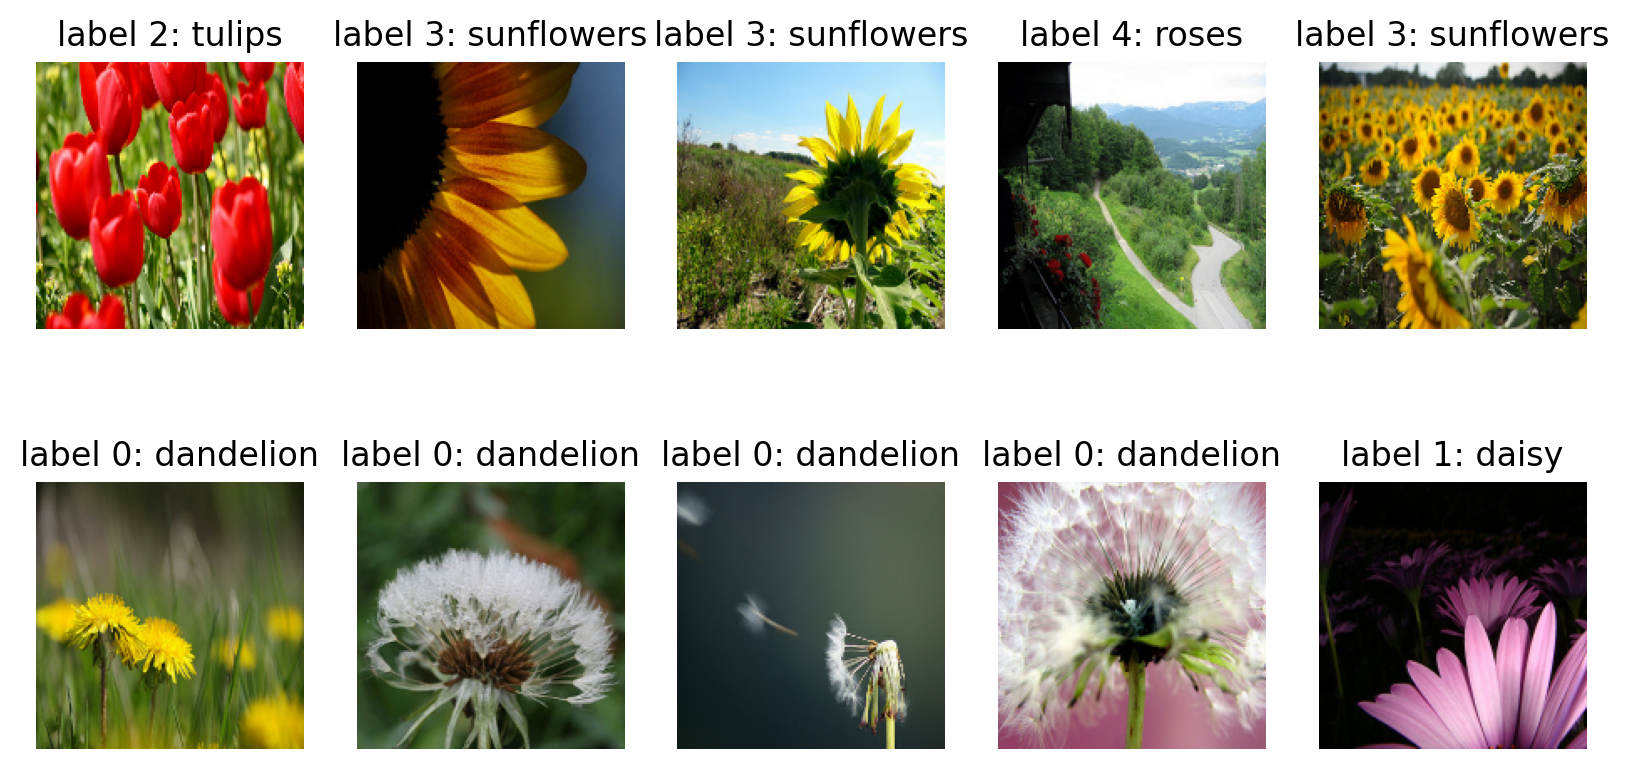

In [450]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [451]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

print("슝~")

슝~


In [452]:
BATCH_SIZE = 4
SHUFFLE_BUFFER_SIZE = 2000
print("슝~")

슝~


In [453]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)
print("슝~")

슝~


In [454]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape

(TensorShape([4, 160, 160, 3]), TensorShape([4]))

# Transfer Learning (ResNet50)

In [455]:
# tranfer Learing (ResNet50)
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model ResNet50
base_model = tf.keras.applications.ResNet50V2(
    input_shape=IMG_SHAPE,
    include_top=False, # FC 계층은 따로 학습 시킬 겁니다 #성능이 안나오고 데이터셋이 적어서 그냥 True로 진행 : Failed
    weights='imagenet'
)

In [456]:
image_batch.shape

TensorShape([4, 160, 160, 3])

In [457]:
feature_batch = base_model(image_batch)
feature_batch.shape

TensorShape([4, 5, 5, 2048])

In [458]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 166, 166, 3)          0         ['input_19[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 80, 80, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 82, 82, 64)           0         ['conv1_conv[0][0]']          
                                                                                         

In [459]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
print("슝~")

슝~


In [460]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(4, 2048)


In [461]:
# 활성화 함수는 ReLU를 사용합니다.
dense_layer = tf.keras.layers.Dense(units=32, activation='relu')

# 활성화 함수는 Softmax를 사용합니다.
prediction_layer = tf.keras.layers.Dense(units=5, activation='softmax')

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))
print(prediction_batch.shape)

(4, 5)


In [484]:
# 상위 레이어 수정을 위해 True로 변경
base_model.trainable = True
print("슝~")
# fine Tune 상위 레이어 10개만 my task data로 학습
fine_tune_at = -20
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


# Layers position Check, False가 pre-trained model weight load
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

슝~
0 input_19 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_

In [485]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    dense_layer,
    prediction_layer
])

In [486]:
# base model summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 5, 5, 2048)        23564800  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 8 (GlobalAveragePooling2D)                                      
                                                                 
 dense_36 (Dense)            (None, 32)                65568     
                                                                 
 dense_37 (Dense)            (None, 5)                 165       
                                                                 
Total params: 23630533 (90.14 MB)
Trainable params: 7945413 (30.31 MB)
Non-trainable params: 15685120 (59.83 MB)
_________________________________________________________________


In [487]:
## callbacks: earlystopping, lr_schedule Setting

from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Early Stopping Callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# Learning Rate Scheduler
# 아예 작게 설정해서 에폭이 증가할 때마다 늘어나게 설정
# 계속 변경 중
def learning_rate_scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.2)

lr_scheduler_callback = LearningRateScheduler(learning_rate_scheduler)

In [488]:
base_learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("슝~")

슝~


In [489]:
# Data Augmentation
# 데이터 증강 함수 정의
def apply_augmentation(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)

    return image, label

train_batches = train_batches.map(apply_augmentation)

In [490]:
validation_steps=30
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


30/30 [==============================] - 2s 19ms/step - loss: 0.6167 - accuracy: 0.7750
initial loss: 0.62
initial accuracy: 0.77


In [491]:
EPOCHS = 50

# callback 함수 추가 (Underfitting 방지를 위해 학습률을 작게 감소 시켜봄)
# Epoch을 크게 하기 위해 Earlystopping 추가
history = model.fit(
    train_batches,
    epochs=EPOCHS,
    validation_data=validation_batches,
    callbacks=[early_stopping_callback, lr_scheduler_callback]
)

Epoch 1/50
597/597 [==============================] - 20s 24ms/step - loss: 0.8725 - accuracy: 0.6584 - val_loss: 0.6665 - val_accuracy: 0.7618 - lr: 1.0000e-04
Epoch 2/50
597/597 [==============================] - 14s 24ms/step - loss: 0.7396 - accuracy: 0.7242 - val_loss: 0.4927 - val_accuracy: 0.8327 - lr: 1.0000e-04
Epoch 3/50
597/597 [==============================] - 15s 24ms/step - loss: 0.7105 - accuracy: 0.7330 - val_loss: 0.5924 - val_accuracy: 0.7982 - lr: 1.0000e-04
Epoch 4/50
597/597 [==============================] - 15s 24ms/step - loss: 0.6234 - accuracy: 0.7661 - val_loss: 0.5471 - val_accuracy: 0.8091 - lr: 1.0000e-04
Epoch 5/50
597/597 [==============================] - 15s 24ms/step - loss: 0.6065 - accuracy: 0.7720 - val_loss: 0.4874 - val_accuracy: 0.8255 - lr: 1.0000e-04
Epoch 6/50
597/597 [==============================] - 15s 24ms/step - loss: 0.5880 - accuracy: 0.7800 - val_loss: 0.4583 - val_accuracy: 0.8382 - lr: 1.0000e-04
Epoch 7/50
597/597 [==============

In [492]:
# Test evaluate
test_steps = 20  # 테스트 스텝 수를 설정합니다.
loss_test, accuracy_test = model.evaluate(test_batches, steps=test_steps)

print("Test Loss: {:.2f}".format(loss_test))
print("Test Accuracy: {:.2f}".format(accuracy_test))

20/20 [==============================] - 0s 14ms/step - loss: 0.3007 - accuracy: 0.9125
Test Loss: 0.30
Test Accuracy: 0.91


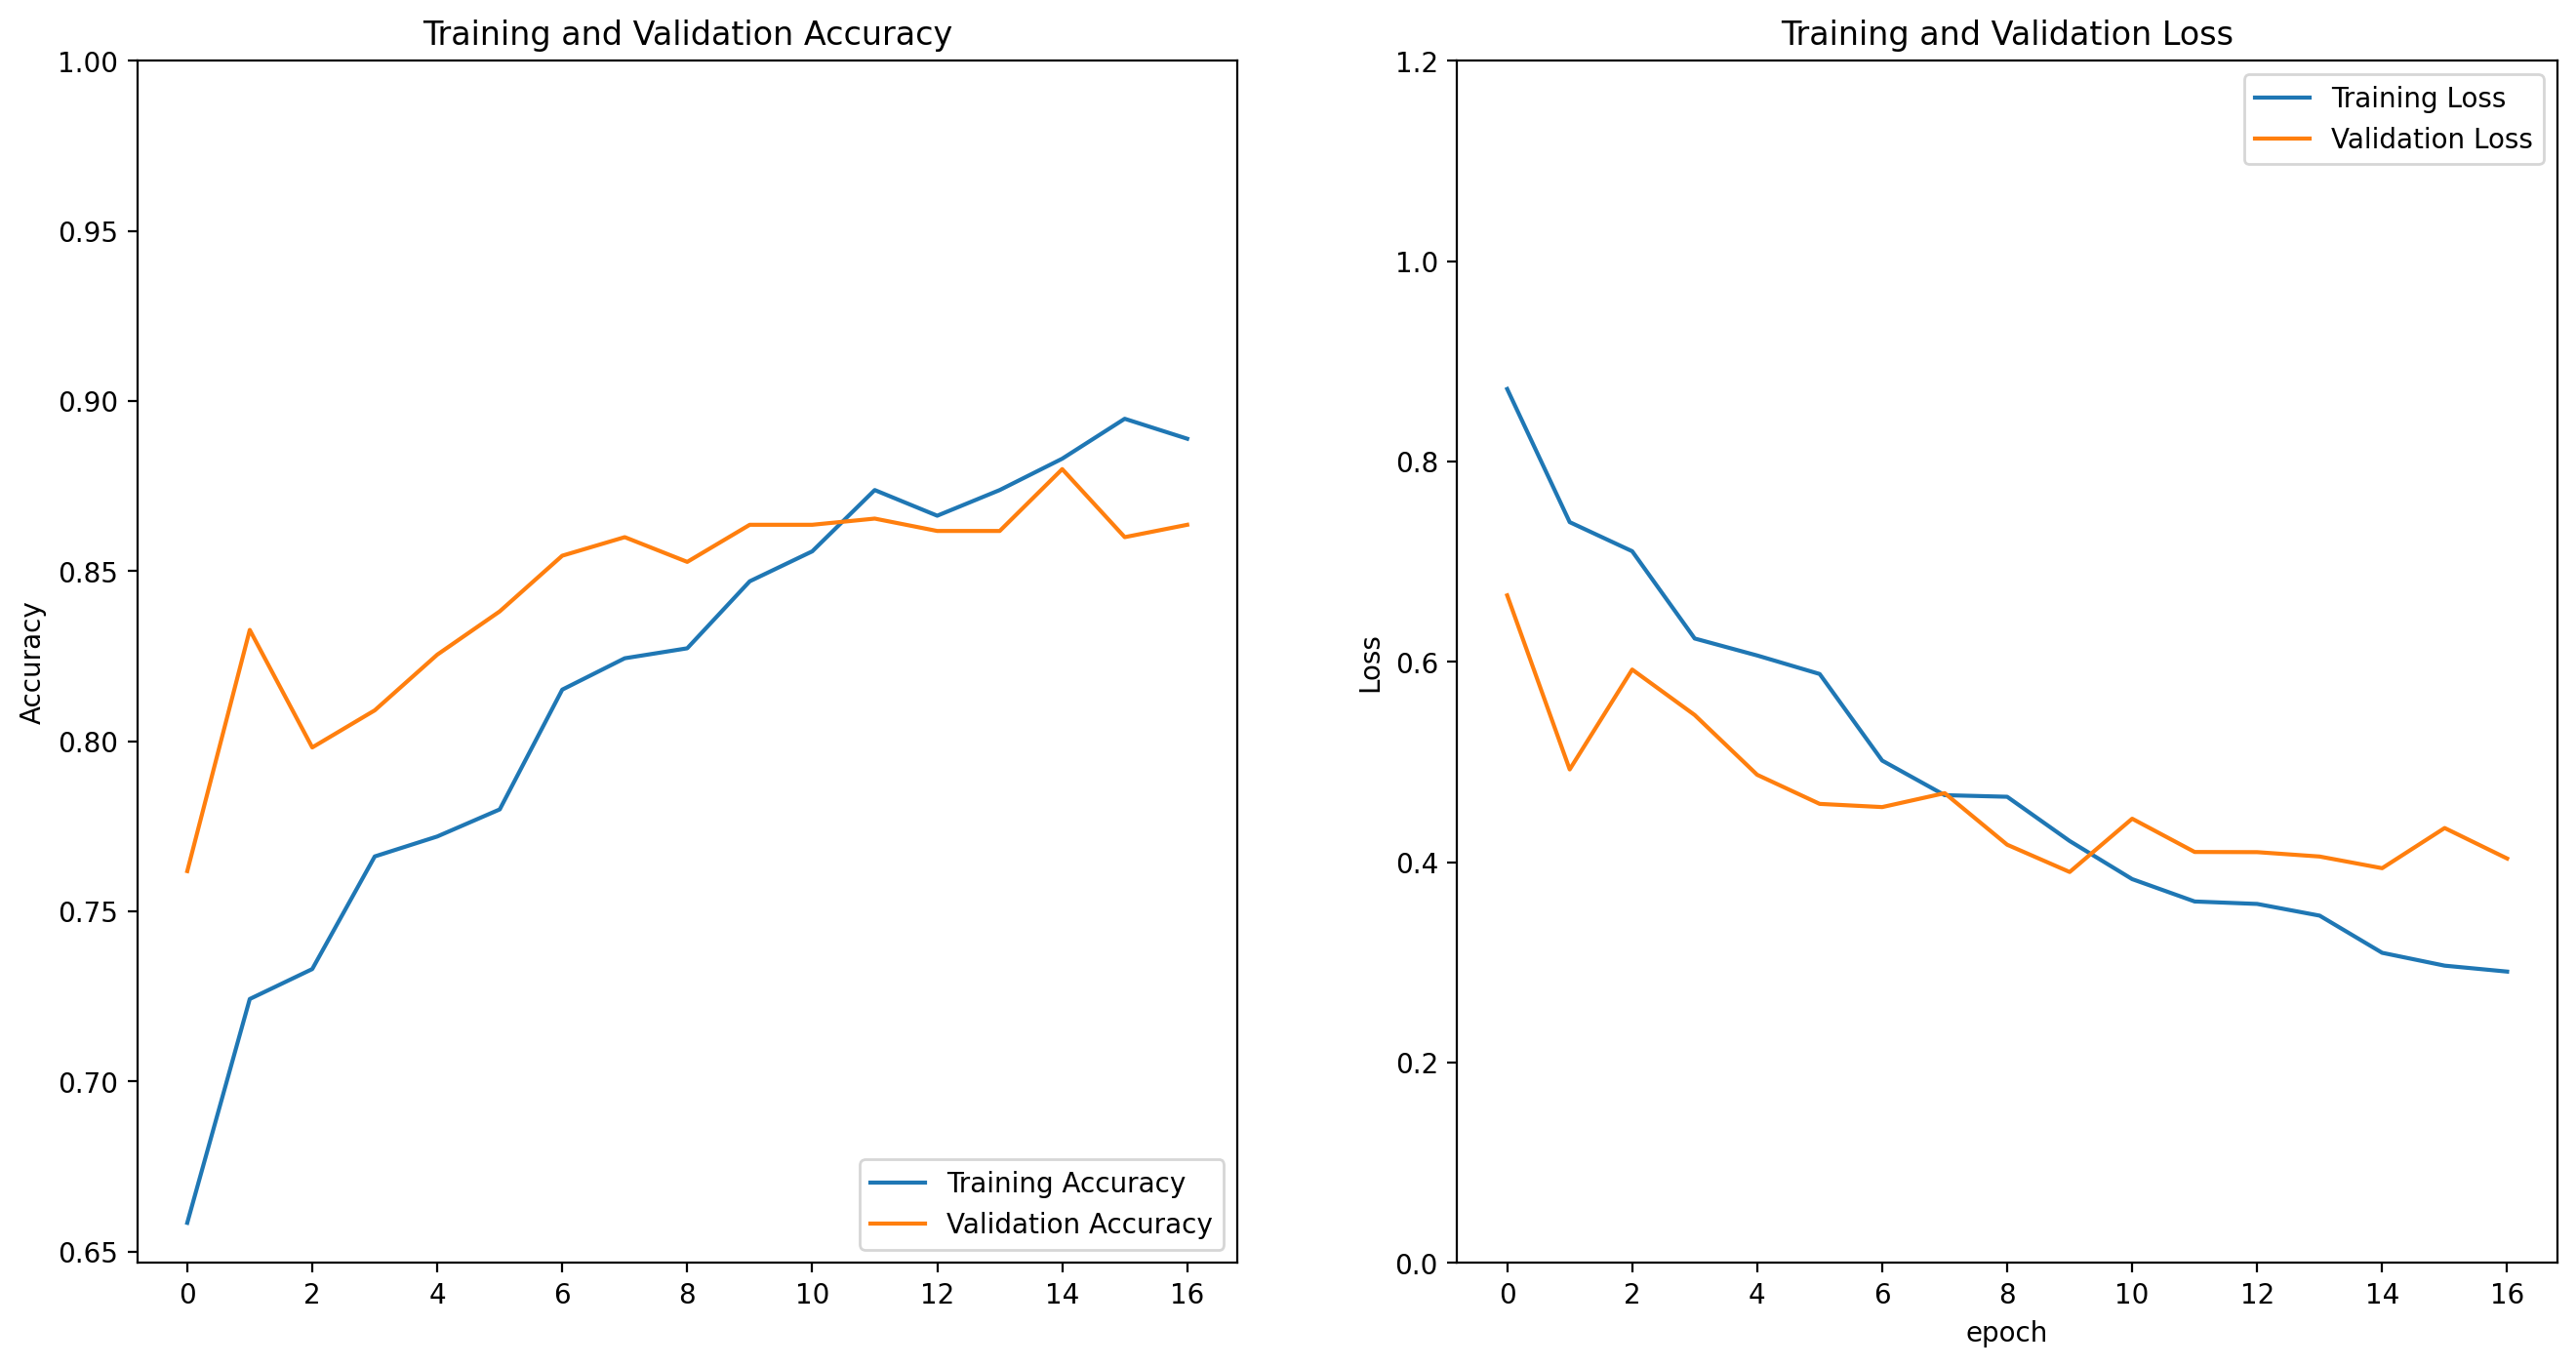

In [493]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim([0,1.2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Test01

* Data Augmentation 항시 적용
* Validation step = 80
* epoch = 80
* Learning_rate = 0.001
* BATCH_SIZE = 4
* SHUFFLE_BUFFER_SIZE = 2000

# Test02
* fit을 이어서 2번 했더니 나온 결과 (영향이 있나? lr만 조절 test, val acc > 25% > 50% 향상)
* validation loss 가 잘 줄지 않는 것은 데이터 양이 적어서 그런 것이라 예상합니다

* fine tuning : pre-trained model 상위 10개 레이어 내 task에 맞는 데이터 학습
* Lrs 추가 : fine tune 에서는 lr 작은게 좋다고 확인
* recall, precision 추가 정확한 성능 확인
(이진 분류에서만 사용되는 지표 였음..)
* Data Augmentation 항시 적용
* Validation step = 30
* epoch = 30
* Learning_rate = 0.0001 (아예 작게 해서 에폭에 증가에 따라 점점 증가하게 설정)
(구조를 바꾸고 나서 Lr이 증가하니깐 성능 감소-train은 잘 되었으나, val, test 25%대 수평 그래프)
(소폭으로 감소하게 재설정)
* BATCH_SIZE = 4
* SHUFFLE_BUFFER_SIZE = 2000

# Test03
* test 89%까지 성능 향상 (에폭을 조금 더 늘리면 90% 예상)
* 이전 오버피팅까지 예방하면서 제일 예쁜 그래프 형성
* 1>2>3 분석 및 비교 예정

* 런타임 해제 후 재실행 (fit 중복 영향 확인을 위함)
* lr 조금 더 감소 시키면서 학습할 수 있게 설정 (Validation loss 감소를 위함)
* Data separation 70% 20% 10% 으로 변경해서 진행 (dataset이 적어서 오버피팅 된다고 판단)

# Test04

* pre-trained model ResNet50V2로 변경 (89 > 91.25%)
* 아무 조건 없이 모델만 변경했을 때 (test 01 60% > 85%)

# Test05

* Data Augmentation의 영향력 확인을 위해 지우고 실행
* 성능

# Test06

* 데이터 증강 X, Dense units- 32 > 1000 증가 예정 (혁희님 아이디어)
* 성능 대폭 저하 test Acc : 91.25% > 76%

# Test_Final

* 데이터 증강 추가 (Zoom)
* lrscheduler 지수 함수 이용 20% 점차 계속 감소
* 데이터 셋 분리 비율 변경
* fine Tune 상위 레이엉 20개 (domain feature 추출)
* fit > lr 수정 fit 추가 학습 (91%)